In [1]:
#deteccion de objetos
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#abrio mi fit filtro v (imagen reduccioda)
imagenV = fits.open('Img_V.fits')[0]

#extraemos data y header
dataV = imagenV.data
headerV = imagenV.header
headerV

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{7524519a-ed8c-4d

In [3]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO V
thresholdV = detect_threshold(dataV, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourV = detect_sources(dataV, thresholdV, npixels=10)
#Mostramos el número de fuentes detectadas
sourV

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11816
labels: [    1     2     3     4     5 ... 11812 11813 11814 11815 11816]

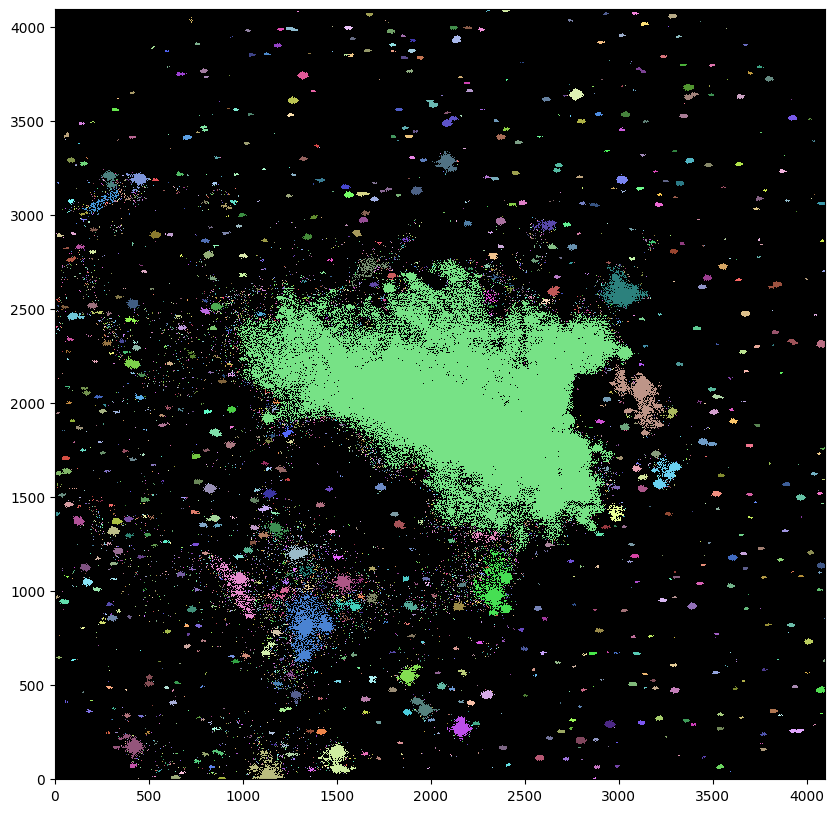

In [4]:
#Generamos un mapa de color para cada fuente del filtro V
cmap_sourV = sourV.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourV, origin='lower', cmap=cmap_sourV, interpolation='nearest')
plt.show()

In [5]:
# separamos las fuentes 
sour_deblend = deblend_sources(dataV, sourV, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblend

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 11816
labels: [    1     2     3     4     5 ... 11812 11813 11814 11815 11816]

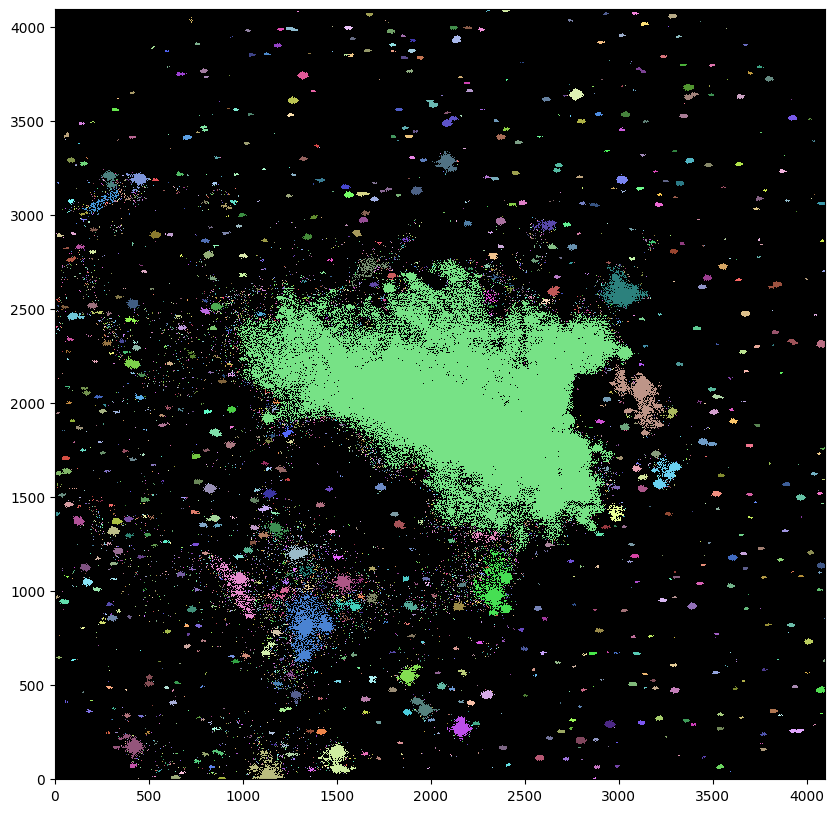

In [6]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap= cmap_deblend, interpolation='nearest')
plt.show()

In [7]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO V
cat = SourceCatalog(dataV, sour_deblend)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1 = cat.to_table()
tablav = tb1['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flojo total (no es el real pq no cuenta el tiempo de exp)'

tablav


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,873.8756408691406
2,640.3660450757791,7.540612483031317,867.0,75837.02642440796
3,888.534234439814,4.140159779522599,460.0,31536.92804336548
4,1133.4554647591967,14.712464522467947,11428.0,3778234.254562378
5,2869.8282614606205,2.8435330183838246,109.0,4799.4655113220215
6,770.407749952893,5.204816344508839,10.0,402.99425506591797
7,1330.9047290475166,5.186673413030547,10.0,408.38694763183594
8,678.9346938432138,8.153916399914866,19.0,760.8893280029297


In [8]:
#calculamos el flujo real 
tablav['segment_flux'] = tablav['segment_flux']/headerV['EXPTIME']
tablav

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,29.129188028971353
2,640.3660450757791,7.540612483031317,867.0,2527.9008808135986
3,888.534234439814,4.140159779522599,460.0,1051.2309347788494
4,1133.4554647591967,14.712464522467947,11428.0,125941.14181874593
5,2869.8282614606205,2.8435330183838246,109.0,159.98218371073406
6,770.407749952893,5.204816344508839,10.0,13.433141835530598
7,1330.9047290475166,5.186673413030547,10.0,13.612898254394532
8,678.9346938432138,8.153916399914866,19.0,25.362977600097658


In [9]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT 
#puse un valor falso x mientras
zeropoint = 39.34044722557779
tablav['magnitude'] = zeropoint - 2.5*np.log(tablav['segment_flux'])
tablav

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,446.1964448413885,2.038330979816175,21.0,29.129188028971353,30.911095484241546
2,640.3660450757791,7.540612483031317,867.0,2527.9008808135986,19.75258586067992
3,888.534234439814,4.140159779522599,460.0,1051.2309347788494,21.94615453717924
4,1133.4554647591967,14.712464522467947,11428.0,125941.14181874593,9.981522354646557
5,2869.8282614606205,2.8435330183838246,109.0,159.98218371073406,26.652791082513186
6,770.407749952893,5.204816344508839,10.0,13.433141835530598,32.84613491366939
7,1330.9047290475166,5.186673413030547,10.0,13.612898254394532,32.81290286469706
8,678.9346938432138,8.153916399914866,19.0,25.362977600097658,31.25722088575356


In [10]:
#Mostramos las magnitudes
np.sort(tablav['magnitude'])

2.2729104395071715
9.783182762879918
9.981522354646557
10.37796873530916
10.612338760219131
11.023024753731004
11.056794624366827
11.084035774379089
12.188399923143063
12.190975388087434
12.209281844452498


In [11]:
#ahora para filtro b, abro mi fit filtro b (imagen reduccioda)
imagenB = fits.open('Img_B.fits')[0]

#extraemos data y header
dataB = imagenB.data
headerB = imagenB.header
headerB

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{36922ce2-fadc-41

In [12]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes EN EL FILTRO b
thresholdB = detect_threshold(dataB, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sourB = detect_sources(dataB, thresholdB, npixels=10)
#Mostramos el número de fuentes detectadas
sourB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9528
labels: [   1    2    3    4    5 ... 9524 9525 9526 9527 9528]

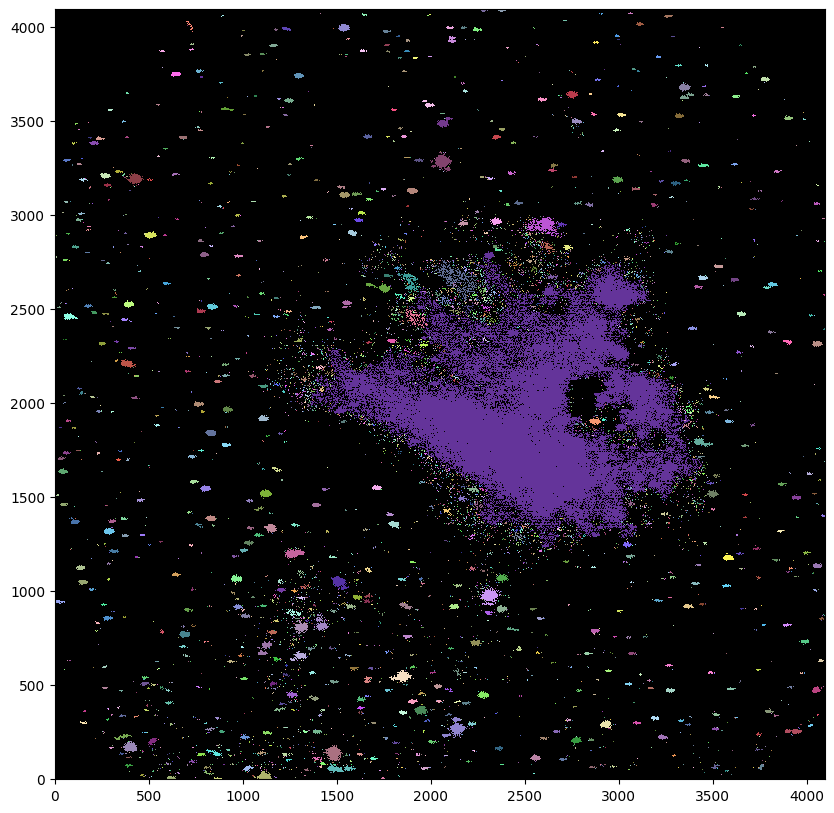

In [13]:
#Generamos un mapa de color para cada fuente del filtro B
cmap_sourB = sourB.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sourB, origin='lower', cmap=cmap_sourB, interpolation='nearest')
plt.show()

In [14]:
# separamos las fuentes 
sour_deblendB = deblend_sources(dataB, sourB, npixels=10, nlevels=32, contrast=1)
#esto muestra el numero de fuentes detectadas
sour_deblendB

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9528
labels: [   1    2    3    4    5 ... 9524 9525 9526 9527 9528]

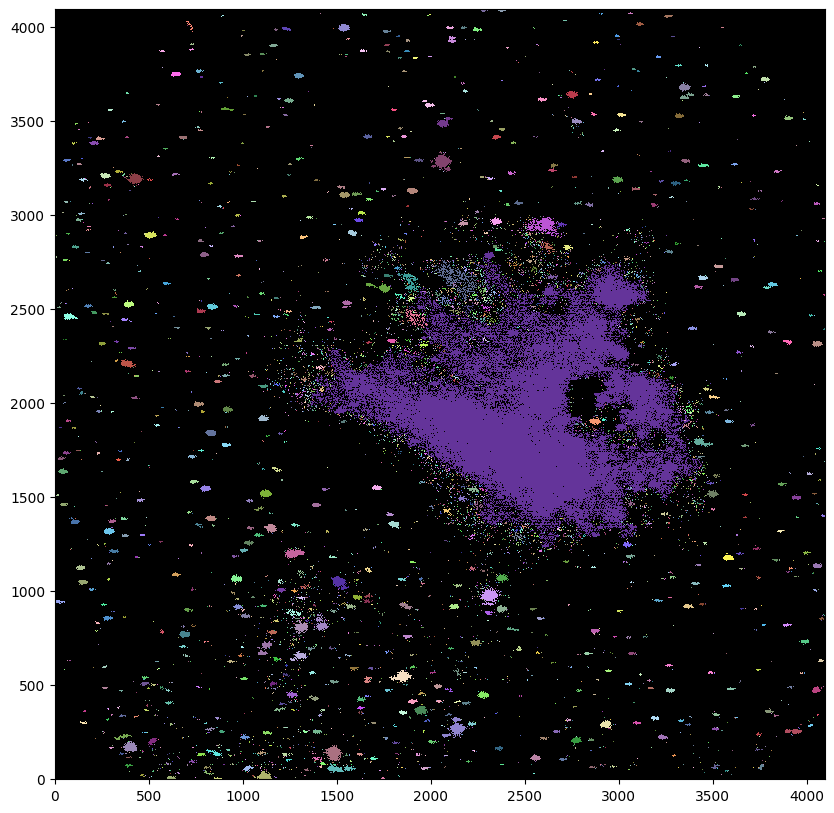

In [15]:
cmap_deblendB = sour_deblendB.make_cmap(seed=123)
#muesta las fuentes detectadas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblendB, origin='lower', cmap= cmap_deblendB, interpolation='nearest')
plt.show()

In [16]:
#OBTENEMOS EL CATALOGO DE FITS REDUCIDO PARA EL FILTRO B
catB = SourceCatalog(dataB, sour_deblendB)
#pasamos el catalogo a una tabla (solo con los datos que nos interesan)
tb1B = catB.to_table()
tablaB = tb1B['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#label: numero id de la fuente'
#xcentroid, ycentroid: coordenadas'
#area: tamaño en pixeles'
#segment_flux: flujo total (no es el real pq no cuenta el tiempo de exp)'

tablaB


label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,393.06616973876953
2,616.9815511143765,5.92772390149682,603.0,21659.553619384766
3,864.6720886742605,2.581800867779408,234.0,6181.294334411621
4,1111.1863440811103,8.554852720255182,2334.0,510803.5832576752
5,1636.056891111873,2.197309739548801,23.0,466.8694877624512
6,1741.2407846110927,2.8766166997617053,145.0,3509.392520904541
7,1960.4709078875526,1.3739191302650122,11.0,233.62675094604492
8,2847.2653194640725,0.9252867430534868,17.0,354.10876655578613


In [17]:
#calculamos el flujo real 
tablaB['segment_flux'] = tablaB['segment_flux']/headerB['EXPTIME']
tablaB

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,13.102205657958985
2,616.9815511143765,5.92772390149682,603.0,721.9851206461589
3,864.6720886742605,2.581800867779408,234.0,206.04314448038738
4,1111.1863440811103,8.554852720255182,2334.0,17026.78610858917
5,1636.056891111873,2.197309739548801,23.0,15.562316258748373
6,1741.2407846110927,2.8766166997617053,145.0,116.97975069681803
7,1960.4709078875526,1.3739191302650122,11.0,7.787558364868164
8,2847.2653194640725,0.9252867430534868,17.0,11.803625551859538


In [18]:
#CALCULAMOS MAG APARENTES CON EL ZEROPONIT 
#puse un valor falso x mientras
zeropoint = 39.022104169660096
tablaB['magnitude'] = zeropoint - 2.5*np.log(tablaB['segment_flux'])
tablaB

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,428.31909334514546,2.1933797068084417,19.0,13.102205657958985,32.59015270248287
2,616.9815511143765,5.92772390149682,603.0,721.9851206461589,22.567092844267243
3,864.6720886742605,2.581800867779408,234.0,206.04314448038738,25.70189020444652
4,1111.1863440811103,8.554852720255182,2334.0,17026.78610858917,14.665746578546859
5,1636.056891111873,2.197309739548801,23.0,15.562316258748373,32.159973250938954
6,1741.2407846110927,2.8766166997617053,145.0,116.97975069681803,27.117102047530395
7,1960.4709078875526,1.3739191302650122,11.0,7.787558364868164,33.89078572273108
8,2847.2653194640725,0.9252867430534868,17.0,11.803625551859538,32.85108733356624


In [19]:
#Mostramos las magnitudes
np.sort(tablaB['magnitude'])

4.353776779997055
12.193886282653175
13.44049079919525
13.588817566320333
14.116083380797804
14.336604239232951
14.665746578546859
15.043820187669173
15.055753931179815
15.714573297759696
15.757448590269593
